# Basic Laue Pattern peak search on Digital Image

## This Notebook is a part of Tutorials on LaueTools Suite.  
Author: J.-S. Micha

Last Revision:   April 2019

tested with python3

**Objectives**

- Load and display Laue pattern images
- Perform a Peak Search

Setting absolute path to LaueTools Modules if Lauetools has not been installed with pip

In [1]:
LaueToolsCode_Folder = '..'
import sys
sys.path.append(LaueToolsCode_Folder)

In [2]:
#%matplotlib inline
%matplotlib notebook

import time,copy,os

# Third party modules
import matplotlib     # graphs and plots
import matplotlib.pyplot as plt
import numpy as np    # numerical arrays

# LaueTools modules

import IOLaueTools as IOLT   # read and write ASCII file  (IO) 
import readmccd as RMCCD       # read CCD and detector binary file, PeakSearch methods

LaueToolsCode_Folder = os.path.abspath(LaueToolsCode_Folder)
print('absolute path of LaueTools package',LaueToolsCode_Folder)

LaueToolsProjectFolder ..
Missing library libtiff, Please install: pylibtiff if you need open some tiff images
module Image / PIL is not installed
Cython compiled module 'gaussian2D' for fast computation is not installed!
module Image / PIL is not installed
absolute path of LaueTools package /home/micha/LaueToolsPy3/LaueTools


/home/micha/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


set folder containing binary images

In [3]:
t0 = time.time()

imagefolder =os.path.join(LaueToolsCode_Folder,'LaueImages')
print('images folder:',imagefolder) 

images folder: /home/micha/LaueToolsPy3/LaueTools/LaueImages


**select image file of interest** (splitting imagefilename allows loop over images:  prefix+index.extension)

In [4]:
prefixfilename= 'Ge_blanc_'
suffix='.mccd'
imageindex=0

imagefilename = prefixfilename+str(imageindex).zfill(4)+suffix
print("imagefilename :",imagefilename)


imagefilename : Ge_blanc_0000.mccd


**read image file and get data**

Function `readCCDimage()` returns `dataimage` as a 2D numpy array with the proper dimensions and orientation given by `framedim` and the geometrical transformations labelled by `fliprot`

In [5]:
dataimage, framedim, fliprot =RMCCD.readCCDimage(imagefilename,dirname=imagefolder)
fullpathimagefile= os.path.join(imagefolder,imagefilename)







nb elements 4194304
framedim (2048, 2048)
framedim nb of elements 4194304


<IPython.core.display.Javascript object>


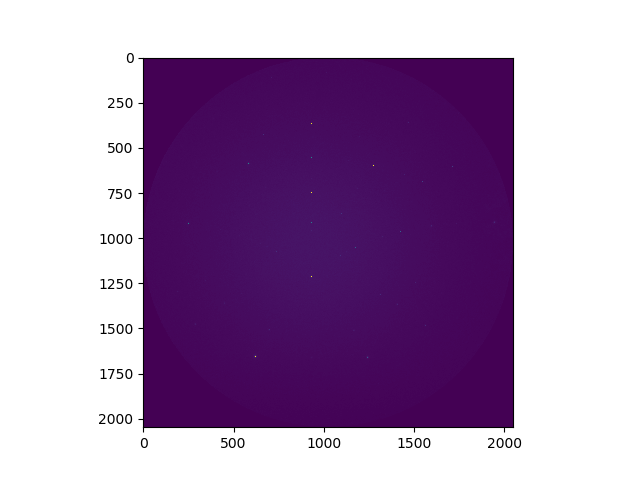

In [6]:
fig, ax = plt.subplots()

ax.imshow(dataimage,vmin=0,vmax=2000)

***peaksearch*** done on modified image 'newdataimage' (by default this is done on image given as first argument). Peaksearch results can purged from peaks already present in file as an optional argument Remove_BlackListedPeaks_fromfile.

In [7]:
import os
ti1= time.time()

#blacklistedpeaksfile=os.path.join(folder,'Blacklist.dat')
blacklistedpeaksfile = None

res=RMCCD.PeakSearch(fullpathimagefile,return_histo=0,local_maxima_search_method=0,
                     IntensityThreshold=2000,
                     boxsize=5,
                     fit_peaks_gaussian=1,
                     FitPixelDev=10,
                     Data_for_localMaxima=None,#newdataimage,
                     Remove_BlackListedPeaks_fromfile=blacklistedpeaksfile)
tps =time.time()
print("peak search time",tps-ti1)







CCDLabel:  PRINCETON
nb of pixels (4194304,)
nb elements 4194304
framedim (2048, 2048)
framedim nb of elements 4194304
image from filename /home/micha/LaueToolsPy3/LaueTools/LaueImages/Ge_blanc_0000.mccd read!
Read Image. Execution time : 0.003 seconds
Data.shape for local maxima (2048, 2048)
Using simple intensity thresholding to detect local maxima (method 1/3)
len(peaklist) 23
Local maxima search. Execution time : 0.311 seconds
Keep 23 from 23 initial peaks (ready for peak positions and shape fitting)

*****************
23 local maxima found

 Fitting of each local maxima

addImax False






nb elements 4194304
framedim (2048, 2048)
framedim nb of elements 4194304
framedim in readoneimage_manycrops (2048, 2048)
10
(10, 10)
10
(10, 10)
10
(10, 10)
10
(10, 10)
10
(10, 10)
10
(10, 10)
10
(10, 10)
10
(10, 10)
10
(10, 10)
10
(10, 10)
10
(10, 10)
10
(10, 10)
10
(10, 10)
10
(10, 10)
10
(10, 10)
10
(10, 10)
10
(10, 10)
10
(10, 10)
10
(10, 10)
10
(10, 10)
10
(10, 10)
10
(10, 10)
10
(1

#### peaks positions in pixel units

In [8]:
peaklist=res[0]
print("nb of peaks in image",len(peaklist))
peaklist[:,:2]

nb of peaks in image 23


array([[ 623.1334887002143 , 1657.7281616140235 ],
       [1244.3262054734876 , 1662.150473603958  ],
       [ 933.0365915823824 , 1215.4409483403153 ],
       [ 585.2254505694141 ,  588.7990375606668 ],
       [1276.6072592468026 ,  600.299820878132  ],
       [ 932.6643784727646 ,  750.0763813513167 ],
       [1596.6221717023882 ,  935.3585891737516 ],
       [ 252.36248575404085,  920.6012873672953 ],
       [1168.3621489873458 , 1512.8229058893362 ],
       [1945.876690838525  ,  914.2222605779697 ],
       [1407.7520909295981 , 1368.2014318306576 ],
       [ 698.6480528964504 , 1509.5132333119182 ],
       [ 934.0239207026548 ,  369.3146863010939 ],
       [ 451.1272168222118 , 1362.4663700487224 ],
       [ 933.3941871172441 ,  555.8063424409482 ],
       [1563.8223175862056 , 1485.1372408962784 ],
       [1175.9268588094635 , 1054.0699461115807 ],
       [ 289.85043878341963, 1478.7700565139444 ],
       [1126.5913578850787 , 1079.1712630074242 ],
       [ 687.5290429860739 , 10

#### if you feel you can get more peaks from the image, you may decide to reduce `IntensityThreshold` if the `PeakSearch` function above

*add markers to image*

<IPython.core.display.Javascript object>


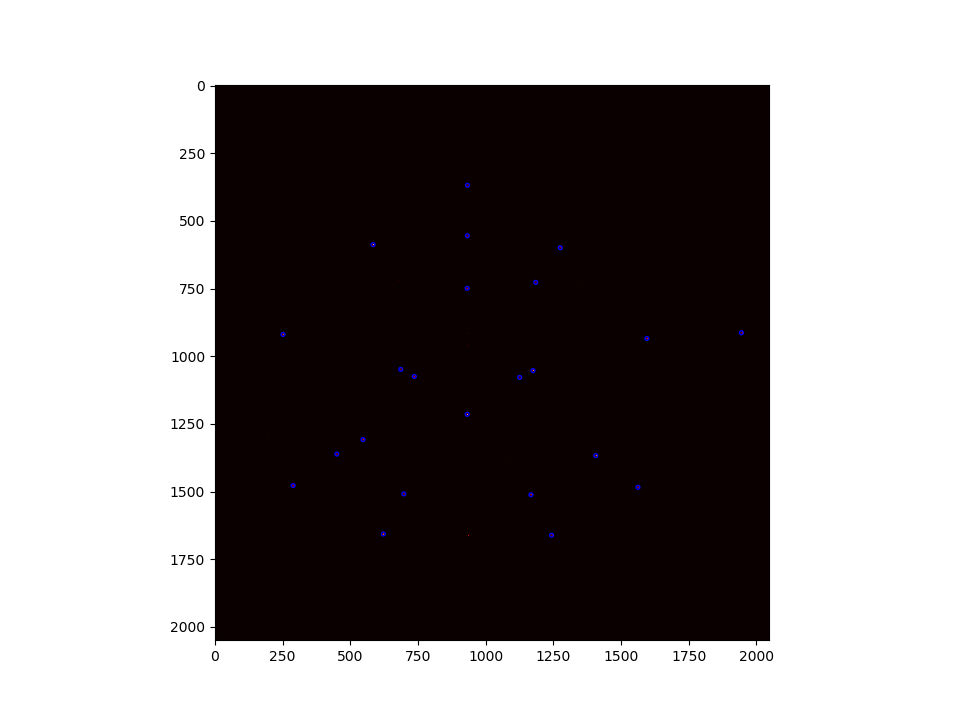

In [9]:
if len(peaklist)<=1: raise ValueError

#datatoplot=newdataimage
datatoplot = dataimage
    
fig, ax = plt.subplots()
ax.imshow(datatoplot,vmin=200,vmax=6000,cmap='hot')

from matplotlib.patches import Circle

F=plt.gcf()
axes=F.gca()
F.get_dpi()
defaultSize=F.get_size_inches()
F.set_size_inches(defaultSize*1.5)

# delete previous patches:

axes.patches = []

# rebuild circular markers
largehollowcircles = []
smallredcircles = []
# correction only to fit peak position to the display
offset_convention = np.array([1, 1])

XYlist = peaklist[:, :2] - offset_convention

for po in XYlist:

    large_circle = Circle(po, 7, fill=False, color='b')
    center_circle = Circle(po, .5 , fill=True, color='r')
    axes.add_patch(large_circle)
    axes.add_patch(center_circle)

    largehollowcircles.append(large_circle)
    smallredcircles.append(center_circle)

In [10]:
outputpeaklistprefix = prefixfilename+'Notebook_'+str(imageindex).zfill(4)
print('peaklist.shape',peaklist.shape)
print("fullpathimagefile",fullpathimagefile)
print('imagefolder',imagefolder)
outputfile= RMCCD.writepeaklist(peaklist,outputpeaklistprefix,outputfolder=imagefolder,initialfilename=fullpathimagefile)
datfilename = outputfile
print('Peaklist in datfilename',datfilename)

peaklist.shape (23, 10)
fullpathimagefile /home/micha/LaueToolsPy3/LaueTools/LaueImages/Ge_blanc_0000.mccd
imagefolder /home/micha/LaueToolsPy3/LaueTools/LaueImages
table of 23 peak(s) with 10 columns has been written in 
/home/micha/LaueToolsPy3/LaueTools/LaueImages/Ge_blanc_Notebook_0000.dat
Peaklist in datfilename /home/micha/LaueToolsPy3/LaueTools/LaueImages/Ge_blanc_Notebook_0000.dat


# **Now indexing**

##### geometry calibration parameters

In [11]:
# detector geometry and parameters as read from calibGe111.det
calibration_parameters = [70.77496, 941.736, 1082.567, 0.631291, -0.68142]
CCDCalibdict = {}
CCDCalibdict['CCDCalibParameters'] = calibration_parameters
CCDCalibdict['framedim'] = (2048, 2048)
CCDCalibdict['detectordiameter'] = 165.
CCDCalibdict['kf_direction'] = 'Z>0'
CCDCalibdict['xpixelsize'] = 0.079142
######
# OR
######
# CCDCalibdict can also be simply build by reading the proper .det file
print("reading geometry calibration file")
CCDCalibdict=IOLT.readCalib_det_file(os.path.join(imagefolder,'calibGe111.det'))
CCDCalibdict['kf_direction'] = 'Z>0'

reading geometry calibration file
calib =  [ 7.07750e+01  9.41740e+02  1.08257e+03  6.31000e-01 -6.81000e-01
  7.91400e-02  2.04800e+03  2.04800e+03]
matrix =  [ 0.995827 -0.071466 -0.056756  0.012205  0.720614 -0.693229  0.090441
  0.689643  0.71848 ]


##### creation of a .cor file containing for each peak accurate scattering angles (2theta, Chi) in addition to pixel (X,Y) position and intensity (I)

In [12]:
import LaueGeometry as LTGeo
LTGeo.convert2corfile(datfilename,
                         calibration_parameters,
                         dirname_in=imagefolder,
                        dirname_out=imagefolder,
                        CCDCalibdict=CCDCalibdict)
corfilename = datfilename.split('.')[0] + '.cor'
fullpathcorfile = os.path.join(imagefolder,corfilename)

nb of spots and columns in .dat file (23, 3)
file :/home/micha/LaueToolsPy3/LaueTools/LaueImages/Ge_blanc_Notebook_0000.dat
containing 23 peaks
(2theta chi X Y I) written in /home/micha/LaueToolsPy3/LaueTools/LaueImages/Ge_blanc_Notebook_0000.cor


#### create instance of an objet spotsset class

In [13]:
import indexingSpotsSet as ISS
DataSet = ISS.spotsset()

DataSet.importdatafromfile(fullpathcorfile)

Cython compiled module for fast computation of Laue spots is not installed!
Cython compiled 'angulardist' module for fast computation of angular distance is not installed!
Using default module
Cython compiled module for fast computation of angular distance is not installed!
module Image / PIL is not installed
CCD Detector parameters read from .cor file
CCDcalibdict {'dd': 70.775, 'xcen': 941.74, 'ycen': 1082.57, 'xbet': 0.631, 'xgam': -0.681, 'xpixelsize': 0.07914, 'ypixelsize': 0.07914, 'CCDLabel': 'MARCCD165', 'framedim': [2048.0, 2048.0], 'detectordiameter': 162.07872, 'kf_direction': 'Z>0'}


True

### the first most intense spot are listed below. Columns are: spotindex, 2theta, chi, X, Y, Intensity

In [14]:
DataSet.getUnIndexedSpotsallData()[:3]

array([[ 0.0000000e+00,  5.8428888e+01,  2.0127202e+01,  6.2313000e+02,
         1.6577300e+03,  2.9799380e+04],
       [ 1.0000000e+00,  5.7639606e+01, -1.8419753e+01,  1.2443300e+03,
         1.6621500e+03,  2.2425630e+04],
       [ 2.0000000e+00,  8.0925813e+01,  6.5961500e-01,  9.3304000e+02,
         1.2154400e+03,  2.2197540e+04]])

#### set parameters for indexation

In [15]:
emin=5
# emax can be lowered for large unit cell indexation (but greater than BM32 highest energy is meaningless)
emax=22
key_material='Ge'

dict_indexrefine = {# recognition angle parameters from two sets A and B
                   'AngleTolLUT': 0.5,
                   'nlutmax':3,
                   'central spots indices': [0,1],  # spots set A 
                   'NBMAXPROBED': 10,  # spots set B
                   'MATCHINGRATE_ANGLE_TOL': 0.2,
                # refinement parameters (loop over narrower matching angles)
                   'list matching tol angles':[0.5,0.2,0.1],
               
                # minor parameters
                'MATCHINGRATE_THRESHOLD_IAL': 100,
                   'UseIntensityWeights': False,
                   'nbSpotsToIndex':10000,
                   'MinimumNumberMatches': 3,
                   'MinimumMatchingRate':3
                   }

#


#### before launching the indexation procedure you may want to check a solution found elsewhere or sometimes ago. Then fill `previousResults` as shown

In [16]:
CheckFirstThisMatrix=np.array([[-0.44486058225058 ,  0.098996190230096 ,-0.897868909077371],[-0.883970521873963,0.1130536332378 , 0.462465547362675],
 [ 0.143878606007886, 0.993706753289519 , 0.035064809225047]])
# nb of matrices, list of matrices to check, dummy parameter, dummy parameter
previousResults = 1,[CheckFirstThisMatrix],50,50

#####
# OR
#####

previousResults = None

##### then launch indexation by specifying some parameters:
    nbGrainstoFind: nb of grains of this material you want to find
    set_central_spots_hkl: imposed miller indices [h,k,l] of central spots (set A of spots)  else : None

In [17]:
grainindex=0
DataSet = ISS.spotsset()
    
DataSet.pixelsize = CCDCalibdict['xpixelsize']
DataSet.dim = CCDCalibdict['framedim']
DataSet.detectordiameter = CCDCalibdict['detectordiameter']
DataSet.kf_direction = CCDCalibdict['kf_direction']
DataSet.key_material = key_material
DataSet.emin = emin
DataSet.emax = emax

DataSet.IndexSpotsSet(fullpathcorfile, key_material, emin, emax, dict_indexrefine, None,
                         use_file=1, # read .cor file and reset also spots properties dictionary
                         IMM=False,LUT=None,n_LUT=dict_indexrefine['nlutmax'],angletol_list=dict_indexrefine['list matching tol angles'],
                        nbGrainstoFind=1,  # nb of grains of the same material in this case
                        set_central_spots_hkl=None,  # set hkl of spots of set A
                        MatchingRate_List=[10, 10,10,10,10],  # minimum matching rate figure to keep on looping for refinement
                        verbose=0,
                        previousResults=previousResults, # check before the orientation if not None
                        corfilename=corfilename)

# write unindexed spots list in a .cor file
DataSet.writecorFile_unindexedSpots(corfilename=corfilename,
                                                dirname=imagefolder,
                                                filename_nbdigits=4)

# write .fit file of indexed spots belonging to grain #0
DataSet.writeFitFile(0,corfilename=corfilename,dirname=imagefolder)

CCD Detector parameters read from .cor file
CCDcalibdict {'dd': 70.775, 'xcen': 941.74, 'ycen': 1082.57, 'xbet': 0.631, 'xgam': -0.681, 'xpixelsize': 0.07914, 'ypixelsize': 0.07914, 'CCDLabel': 'MARCCD165', 'framedim': [2048.0, 2048.0], 'detectordiameter': 162.07872, 'kf_direction': 'Z>0'}
self.pixelsize in IndexSpotsSet 0.07914
ResolutionAngstromLUT in IndexSpotsSet False

 Remaining nb of spots to index for grain #0 : 23


 ******
start to index grain #0 of Material: Ge 

******

providing new set of matrices Using Angles LUT template matching
toindexdata [[ 0.00000000e+00  5.84288880e+01  2.01272020e+01  6.23130000e+02
   1.65773000e+03  2.97993800e+04]
 [ 1.00000000e+00  5.76396060e+01 -1.84197530e+01  1.24433000e+03
   1.66215000e+03  2.24256300e+04]
 [ 2.00000000e+00  8.09258130e+01  6.59615000e-01  9.33040000e+02
   1.21544000e+03  2.21975400e+04]
 [ 3.00000000e+00  1.16814981e+02  2.12903630e+01  5.85230000e+02
   5.88800000e+02  9.52883000e+03]
 [ 4.00000000e+00  1.15964464e+0

../indexingSpotsSet.py:3267: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if allpermu is None or allpermu == 'cubic':


code results 1
nb iterations 931
mesg Both actual and predicted relative reductions in the sum of squares
  are at most 0.000000
***********mean pixel deviation    0.1388954046381755     ********
devstrain, lattice_parameter_direct_strain [[ 2.313270703741729e-04 -3.362531382932925e-05  1.412983581193356e-04]
 [-3.362531382932925e-05 -1.839698245795033e-04 -6.241103925177434e-05]
 [ 1.412983581193356e-04 -6.241103925177434e-05 -4.735724579466952e-05]] [ 5.65749437590118   5.655144846516746  5.65592635831853
 90.00715485777327  89.98380389567015  90.00385478183958 ]
For comparison: a,b,c are rescaled with respect to the reference value of a = 5.657500 Angstroms
lattice_parameter_direct_strain [ 5.657500000000001  5.655150468279905  5.655931980858588
 90.00715485777327  89.98380389567015  90.00385478183958 ]
devstrain1, lattice_parameter_direct_strain1 [[ 2.313270703741729e-04 -3.362531382932925e-05  1.412983581193356e-04]
 [-3.362531382932925e-05 -1.839698245795033e-04 -6.24110392517743

code results 1
nb iterations 931
mesg Both actual and predicted relative reductions in the sum of squares
  are at most 0.000000
***********mean pixel deviation    0.1388954046381755     ********
devstrain, lattice_parameter_direct_strain [[ 2.313270703741729e-04 -3.362531382932925e-05  1.412983581193356e-04]
 [-3.362531382932925e-05 -1.839698245795033e-04 -6.241103925177434e-05]
 [ 1.412983581193356e-04 -6.241103925177434e-05 -4.735724579466952e-05]] [ 5.65749437590118   5.655144846516746  5.65592635831853
 90.00715485777327  89.98380389567015  90.00385478183958 ]
For comparison: a,b,c are rescaled with respect to the reference value of a = 5.657500 Angstroms
lattice_parameter_direct_strain [ 5.657500000000001  5.655150468279905  5.655931980858588
 90.00715485777327  89.98380389567015  90.00385478183958 ]
devstrain1, lattice_parameter_direct_strain1 [[ 2.313270703741729e-04 -3.362531382932925e-05  1.412983581193356e-04]
 [-3.362531382932925e-05 -1.839698245795033e-04 -6.24110392517743

In [18]:
DataSet.getSpotsFamilyallData(0)

array([[ 0.000000000000000e+00,  5.842888800000000e+01,
         2.012720200000000e+01,  6.231300000000000e+02,
         1.657730000000000e+03,  2.979938000000000e+04,
        -2.000000000000000e+00,  4.000000000000000e+00,
         2.000000000000000e+00,  1.099875735129271e+01],
       [ 1.000000000000000e+00,  5.763960600000000e+01,
        -1.841975300000000e+01,  1.244330000000000e+03,
         1.662150000000000e+03,  2.242563000000000e+04,
        -2.000000000000000e+00,  2.000000000000000e+00,
         4.000000000000000e+00,  1.113684422585697e+01],
       [ 2.000000000000000e+00,  8.092581300000001e+01,
         6.596150000000000e-01,  9.330400000000000e+02,
         1.215440000000000e+03,  2.219754000000000e+04,
        -3.000000000000000e+00,  3.000000000000000e+00,
         3.000000000000000e+00,  8.774391297127986e+00],
       [ 3.000000000000000e+00,  1.168149810000000e+02,
         2.129036300000000e+01,  5.852300000000000e+02,
         5.888000000000000e+02,  9.5288300000

DataSet is an object with many attributes and methods related to spots properties (indexed or not, belonging to grains counted from zero). By press Tab key after having typed `DataSet.` can show you infos about spots methods and attributes listed below:

In [19]:
dir(DataSet)

['AngTol_LUTmatching',
 'AssignHKL',
 'B0matrix',
 'B_LUT',
 'CCDLabel',
 'FindOrientMatrices',
 'IMMdatabase',
 'IndexSpotsSet',
 'LUT',
 'LabelMissingReflections',
 'MinimumNumberMatches',
 'MissingRefindexedgrains',
 'ResolutionAngstromLUT',
 'TwiceTheta_Chi_Int',
 'UBStack',
 'UseIntensityWeights',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'absolute_index',
 'alldata',
 'computeLUT',
 'detectordiameter',
 'detectorparameters',
 'deviatoricstrain',
 'dict_IMM',
 'dict_Missing_Reflections',
 'dict_grain_Ts',
 'dict_grain_devstrain',
 'dict_grain_matching_rate',
 'dict_grain_matrix',
 'dict_grain_twins',
 'dict_indexedgrains_material',
 'dim',
 'emax',
 'emin',
